In [1]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import os
# import torch
# import torch.nn.functional as F
# from torchvision.transforms.functional import to_tensor, to_pil_image
# import random

# import sys
# sys.path.append('/notebooks/pix2pixHD/segment_script')
# from lr_aspp import LiteRASPP

In [2]:
# # Dice coefficient and loss functions
# def dice_coefficient(true_mask, pred_mask):
#     smooth = 1.0  # to avoid division by zero
#     true_flat = true_mask.view(-1)
#     pred_flat = pred_mask.view(-1)
#     intersection = (true_flat * pred_flat).sum()
#     return (2. * intersection + smooth) / (true_flat.sum() + pred_flat.sum() + smooth)

# def dice_loss(true_mask, pred_mask):
#     return 1 - dice_coefficient(true_mask, pred_mask)

# class Segmenter:
#     def __init__(self, model_path, device):
#         self.device = device
#         self.segmentation_model = LiteRASPP.load(model_path, device).eval()

#     def segment_image(self, image):
#         # Convert PIL image to tensor and add batch dimension
#         image_tensor = to_tensor(image).unsqueeze(0).to(self.device)

#         # Normalize the RGB image
#         mu, sigma = self.calculate_mean_std(image_tensor)
#         normalized_image = (image_tensor - mu.view(1, 3, 1, 1)) / sigma.view(1, 3, 1, 1)

#         # Process with segmentation model
#         with torch.no_grad():
#             logits = self.segmentation_model(normalized_image)
#             softmax_scores = F.interpolate(logits, size=image_tensor.size()[2:], mode='bilinear').squeeze().softmax(0)[1]
#             mask = (softmax_scores >= 0.55).float().unsqueeze(0)  # Adjust for batch dimension
#             mask = mask.repeat(1, 3, 1, 1)  # Repeat to match the RGB channels
#         return to_pil_image(mask[0]), mask[0]  # Return both PIL image for plotting and tensor for Dice calculation

#     def calculate_mean_std(self, image):
#         channels_flat = image.view(image.size(0), image.size(1), -1)
#         mean = channels_flat.mean(2).mean(0)
#         std = channels_flat.std(2).mean(0)
#         return mean, std


In [3]:
# # Initialize the segmenter
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# segmenter = Segmenter('./segment_model/fine_tuning.pt', device)

# def plot_random_images(num_images=15):
#     real_images_dir = './datasets/airway_dataset/Lehrvideo-3/'
#     processed_images_dir_rand = './results/depth2RB_old/test_latest/images/'
#     processed_images_dir_not_rand = './results/depth2RB_64/test_latest/images/'

#     # Get all image filenames in the real images directory
#     all_real_images = [f for f in os.listdir(real_images_dir) if os.path.isfile(os.path.join(real_images_dir, f))]
#     random.shuffle(all_real_images)  # Shuffle the list of images
#     selected_images = all_real_images[:num_images]  # Select the first num_images after shuffling

#     fig, axs = plt.subplots(num_images, 7, figsize=(21, num_images * 4))  # Now 6 columns to include the Dice results

#     for i, image_name in enumerate(selected_images):
#         base_name = image_name.split('.')[0]
#         paths = {
#             "real": os.path.join(real_images_dir, image_name),
#             "label": os.path.join(processed_images_dir_rand, base_name + '_input_label.png'),
#             "synthesized": os.path.join(processed_images_dir_rand, base_name + '_synthesized_image.png'),
#             "synthesized_not_shuffled": os.path.join(processed_images_dir_not_rand, base_name + '_synthesized_image.png'),
#         }
#         titles = ["Real Image", "Input Label", "Synthesized Image (shuffled)", "Synthesized Image (not shuffled)" ,"Real Image Mask", "Synthesized Image Mask", "Dice Results"]

#         real_mask_tensor = None
#         synthesized_mask_tensor = None

#         # Load and display each image
#         for j, (key, path) in enumerate(paths.items()):
#             if not os.path.exists(path):
#                 continue
#             image = Image.open(path)
#             axs[i, j].imshow(image)
#             axs[i, j].axis('off')
#             axs[i, j].set_title(f"{titles[j]}\n({os.path.basename(path)})")

#             if key == "real":
#                 real_mask_pil, real_mask_tensor = segmenter.segment_image(image)
#                 axs[i, 4].imshow(real_mask_pil)
#                 axs[i, 4].axis('off')
#                 axs[i, 4].set_title(f"{titles[4]}\n({os.path.basename(path)})")

#             if key == "synthesized":
#                 synthesized_mask_pil, synthesized_mask_tensor = segmenter.segment_image(image)
#                 axs[i, 5].imshow(synthesized_mask_pil)
#                 axs[i, 5].axis('off')
#                 axs[i, 5].set_title(f"{titles[5]}\n({os.path.basename(path)})")
                
                
#         # Ensure both masks are of the same size
#         if real_mask_tensor is not None and synthesized_mask_tensor is not None:
#             synthesized_mask_tensor = F.interpolate(synthesized_mask_tensor.unsqueeze(0), size=real_mask_tensor.size()[1:], mode='bilinear').squeeze(0)
#             dice_coeff = dice_coefficient(real_mask_tensor, synthesized_mask_tensor)
#             dice_loss_value = dice_loss(real_mask_tensor, synthesized_mask_tensor)
#             result_text = f"Dice Coeff: {dice_coeff:.4f}\nDice Loss: {dice_loss_value:.4f}"
#             axs[i, 6].text(0.5, 0.5, result_text, verticalalignment='center', horizontalalignment='center', fontsize=12, transform=axs[i, 6].transAxes)
#             axs[i, 6].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Example usage
# plot_random_images()

### Results without dice loss

Found 1 complete image sets


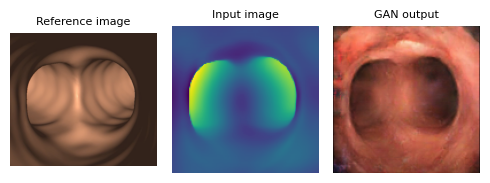

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob

def plot_image_sets(ref_folder, depth_folder, gan_folder, num_samples=5):
    # Get all reference images
    ref_images = sorted(glob.glob(os.path.join(ref_folder, "*.png")))
    
    # Create sets of matching images
    image_sets = []
    for ref_path in ref_images:
        base_name = os.path.basename(ref_path)
        img_num = base_name.replace('.png', '')
        
        depth_path = os.path.join(depth_folder, f"{img_num}_input_label.png")
        gan_path = os.path.join(gan_folder, f"{img_num}_synthesized_image.png")
        
        if os.path.exists(depth_path) and os.path.exists(gan_path):
            image_sets.append((ref_path, depth_path, gan_path))
    
    print(f"Found {len(image_sets)} complete image sets")
    
    if not image_sets:
        print("Error: No complete image sets found!")
        return
    
    # Take the first num_samples instead of random sampling
    num_samples = min(num_samples, len(image_sets))
    selected_sets = image_sets[:num_samples]  # Changed from random.sample
    
    # Adjusted figure size and spacing
    fig, axes = plt.subplots(num_samples, 3, figsize=(5, 2.5*num_samples))
    plt.subplots_adjust(hspace=0.1)
    
    if num_samples == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (ref_path, depth_path, gan_path) in enumerate(selected_sets):
        # Get base names for titles
        ref_name = os.path.basename(ref_path)
        depth_name = os.path.basename(depth_path)
        gan_name = os.path.basename(gan_path)

        # Load and plot reference image
        ref_img = Image.open(ref_path)
        axes[idx, 0].imshow(ref_img,cmap='gray')
        axes[idx, 0].axis('off')
        axes[idx, 0].set_title(f'Reference image', fontsize=8)
        
        # Load and plot depth map
        depth_img = Image.open(depth_path)
        axes[idx, 1].imshow(depth_img, cmap='gray')
        axes[idx, 1].axis('off')
        axes[idx, 1].set_title('Input image', fontsize=8)
        
        # Load and plot GAN output
        gan_img = Image.open(gan_path)
        axes[idx, 2].imshow(gan_img)
        axes[idx, 2].axis('off')
        axes[idx, 2].set_title('GAN output', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Usage
ref_folder = "../pix2pixHD/datasets/airway_dataset/bbbb"
depth_folder = "../pix2pixHD/results/depth2RB_without_dice/test_latest/images"
gan_folder = "../pix2pixHD/results/depth2RB_without_dice/test_latest/images"

# Plot first 4 sets of images
plot_image_sets(ref_folder, depth_folder, gan_folder, num_samples=4)